## SCRAPING SITO DEL CENTRO RICERCA CER

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.centroeuroparicerche.it/about/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
About Us | CER – Centro Europa Ricerche


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res

['https://www.centroeuroparicerche.it/',
 'https://www.centroeuroparicerche.it/contatti/',
 'https://www.centroeuroparicerche.it/blog/news/',
 'https://www.centroeuroparicerche.it',
 'https://www.centroeuroparicerche.it/blog/interventi/',
 'https://www.centroeuroparicerche.it/privacy-policy/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/la-congiuntura-internazionale/',
 'https://twitter.com/CEReconomia',
 'https://www.centroeuroparicerche.it/attivita/ricerche-e-indagini/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerche-di-mercato/',
 'http://it.linkedin.com/pub/cer-centro-europa-ricerche/61/735/a07',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporti-cer/',
 'https://www.centroeuroparicerche.it/chi-siamo/',
 '#content',
 'https://www.centroeuroparicerche.it/newsletter/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporto-cer-aggiornamenti/',
 'https://www.centroeuroparicerche.it/chi-siamo/organizzazione/',
 'https://www.face

In [4]:
lista_url2 = list(filter(lambda x: x.startswith('https://www.centroeuroparicerche.it/categorie_rapporti/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.centroeuroparicerche.it/categorie_rapporti/ricerche-di-mercato/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rubrica-del-mercato-petrolifero/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporti-cer/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporto-cer-aggiornamenti/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/current-issues/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporti-banche/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/rapporto-banche-aggiornamenti/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/ricerchepassate/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/la-congiuntura-internazionale/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/la-congiuntura-italiana/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/osservatorio-covid-19/',
 'https://www.centroeuroparicerche.it/categorie_rapporti/geopolitica-dellenergia/']

In [5]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Ricerche di mercato | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rubrica del Mercato Petrolifero | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto CER | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto CER Aggiornamenti | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'CURRENT ISSUES | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto BANCHE | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Rapporto BANCHE Aggiornamenti | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Altre ricerche | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'La congiuntura internazionale | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'La congiuntura italiana | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Osservatorio Covid-19 | Categorie Rapporti e Ricerche | CER – Centro Europa Ricerche',
 'Geopolitica dell’

In [6]:
print(texts[0])




HomePageRicerche di mercato 







					Ricerche di mercato				




2019 Foreign Report (OICE-CER)

Pubblicato il 7 Novembre 2019 
				Archiviato in: Ricerche di mercato







Più Info →








Le politiche pubbliche della Regione Lazio lette attraverso i Conti Pubblici Territoriali

Pubblicato il 4 Ottobre 201921 Ottobre 2019 
				Archiviato in: Ricerche di mercato







Più Info →








Rilevazione annuale OICE-CER (2019)

Pubblicato il 1 Agosto 201929 Ottobre 2019 
				Archiviato in: Ricerche di mercato







Più Info →








La competitività di Roma nel confronto con le altre Città metropolitane. Un’analisi constant-market-share

Pubblicato il 3 Aprile 201921 Ottobre 2019 
				Archiviato in: Ricerche di mercato







Più Info →








Analisi di benchmarking su tassi d’interesse del mercato bancario italiano. Nota metodologica

Pubblicato il 6 Febbraio 201921 Ottobre 2019 
				Archiviato in: Ricerche di mercato







Più Info →








Previsioni del Margine di Inter

### TEXT CLEANING

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

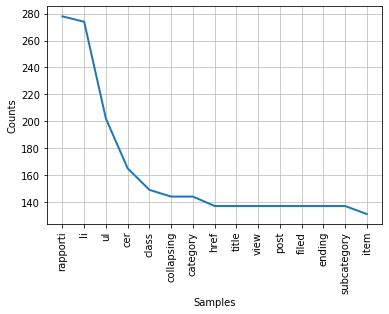

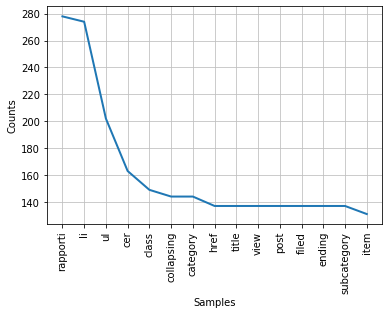

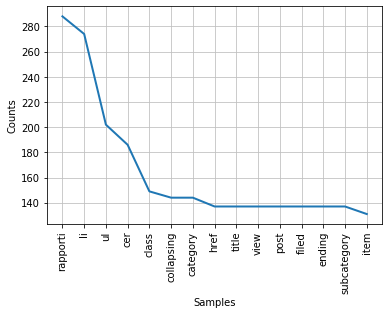

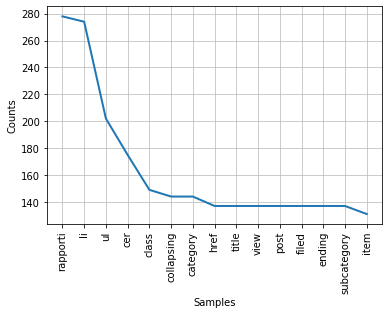

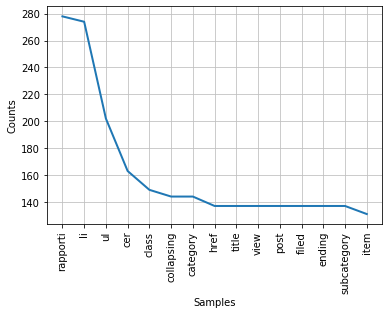

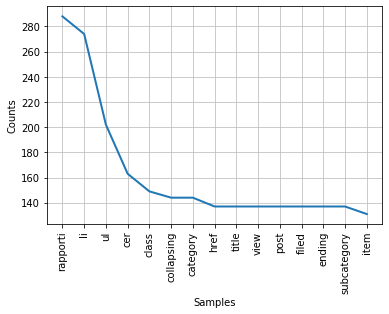

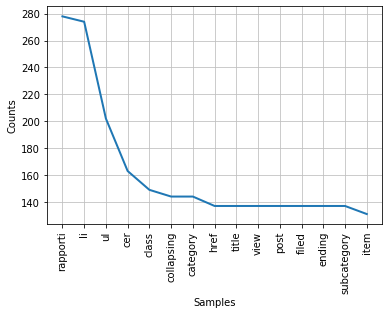

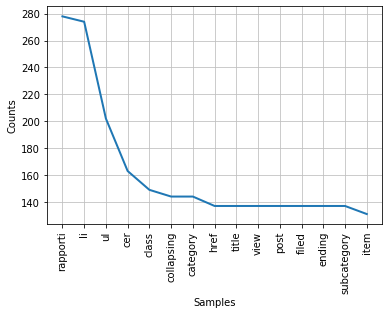

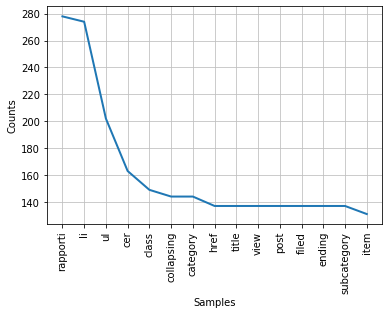

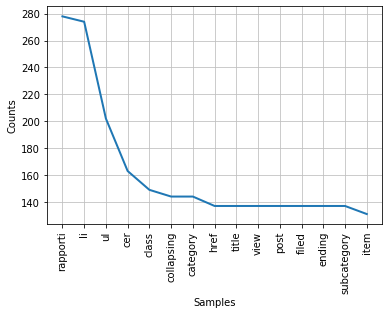

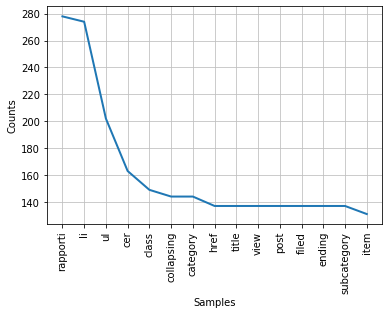

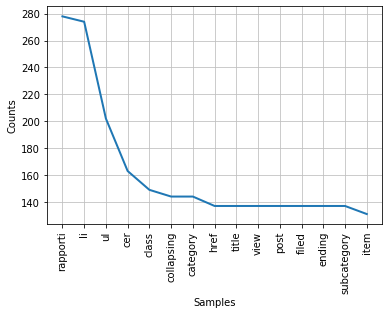

In [9]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

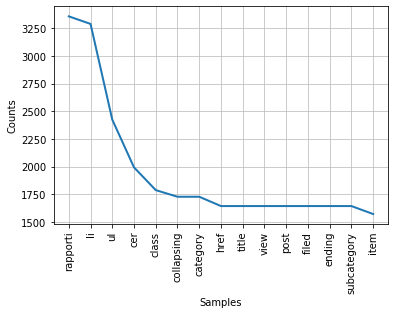

In [10]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

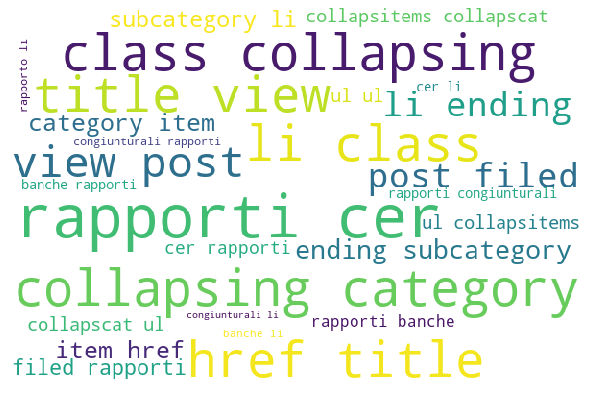

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

solo parole inglesi

In [12]:
import nltk
words = set(nltk.corpus.words.words())

sent = tot_text
final_string_eng= " ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())

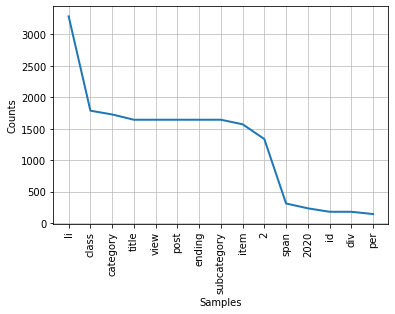

In [13]:
tokens=word_tokenize(final_string_eng)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

## mutual information fra parola e centro di ricerca

In [14]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [15]:
a1=final_string_eng.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'di': 14.172},
 {'2019': 14.3822},
 {'foreign': 21.0547},
 {'report': 21.0547},
 {'7': 15.5311},
 {'pi': 14.1843},
 {'4': 18.0547},
 {'201921': 18.7327},
 {'1': 14.7509},
 {'201929': 21.0547},
 {'la': 15.4108},
 {'con': 21.0547},
 {'un': 19.4697},
 {'constant': 21.0547},
 {'market': 21.0547},
 {'share': 21.0547},
 {'3': 16.7327},
 {'6': 17.5952},
 {'e': 19.0547},
 {'prima': 20.0547},
 {'per': 13.8847},
 {'2021': 21.0547},
 {'10': 18.2473},
 {'banca': 21.0547},
 {'31': 19.4697},
 {'20184': 21.0547},
 {'sull': 20.0547},
 {'al': 20.0547},
 {'18': 19.0547},
 {'201821': 20.0547},
 {'1234567891011': 19.4697},
 {'2020': 13.1781},
 {'2018': 14.5001},
 {'2017': 14.7509},
 {'2016': 14.7879},
 {'2015': 14.8452},
 {'2014': 14.7509},
 {'2013': 14.8452},
 {'2012': 14.8648},
 {'2011': 14.7509},
 {'2010': 13.9778},
 {'2009': 14.0103},
 {'2008': 14.0103},
 {'2007': 13.8847},
 {'2006': 14.0103},
 {'2005': 14.0103},
 {'2004': 14.0103},
 {'2003': 14.0103},
 {'2002': 14.0103},
 {'2001': 14.8847},
 {'2000

In [16]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'li': 9.3717},
 {'class': 10.2505},
 {'category': 10.2998},
 {'title': 10.3717},
 {'view': 10.3717},
 {'post': 10.3717},
 {'ending': 10.3717},
 {'subcategory': 10.3717},
 {'title': 10.3717},
 {'view': 10.3717},
 {'post': 10.3717},
 {'ending': 10.3717},
 {'subcategory': 10.3717},
 {'title': 10.3717},
 {'view': 10.3717},
 {'post': 10.3717},
 {'ending': 10.3717},
 {'subcategory': 10.3717},
 {'title': 10.3717},
 {'view': 10.3717},
 {'post': 10.3717},
 {'ending': 10.3717},
 {'subcategory': 10.3717},
 {'title': 10.3717},
 {'view': 10.3717},
 {'post': 10.3717},
 {'ending': 10.3717},
 {'subcategory': 10.3717},
 {'item': 10.4363},
 {'2': 10.6699},
 {'span': 12.7693},
 {'2020': 13.1781},
 {'id': 13.5628},
 {'div': 13.5628},
 {'id': 13.5628},
 {'div': 13.5628},
 {'per': 13.8847},
 {'2007': 13.8847},
 {'per': 13.8847},
 {'2007': 13.8847},
 {'2010': 13.9778},
 {'2009': 14.0103},
 {'2008': 14.0103},
 {'2006': 14.0103},
 {'2005': 14.0103},
 {'2004': 14.0103},
 {'2003': 14.0103},
 {'2002': 14.0103},